# Example to run inversion using box model
The inversion estimates the emissions deviation from some a priori value

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [2]:
from py12box_invert import core, utils
from py12box_invert.paths import Paths

In [3]:
project_path = Paths.data / "example"
species = "CFC-11"
case = "CFC-11"

This runs the inversion to estimate yearly emissions different to a priori for each box

In [4]:
x_hat, P_hat, emis_ref, time = core.run_inversion(project_path, species, ic0=np.array([253,253,253,253]))

Compiling model...
  0%|          | 0/348 [00:00<?, ?it/s]... done in 8.954298973083496 s
Compiling model...
... done in 0.0008800029754638672 s
... done in 0.03417515754699707 s
100%|██████████| 348/348 [00:45<00:00,  7.67it/s]
Prior emissions uncertainty defaulting to 100 Gg/box/yr


This will calculate annual emissions from the output

In [5]:
x_out, x_sd_out = core.annual_means(x_hat, P_hat, emis_ref)

Plot the results

Text(0, 0.5, 'Emissions Gg/yr')

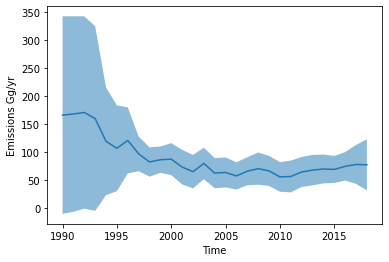

In [6]:
plt.plot(time[::12], x_out)
plt.fill_between(time[::12], x_out-x_sd_out, x_out+x_sd_out, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Emissions Gg/yr")